In [84]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [85]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("Cali_Files/*.cali"))

(1/2) Reading Files:   0%|          | 0/280 [00:00<?, ?it/s]/home/kachhabra02/.local/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1204: RuntimeWarning: invalid value encountered in cast
  if not (lk == lk.astype(rk.dtype))[~np.isnan(lk)].all():
(1/2) Reading Files:   0%|          | 0/280 [00:00<?, ?it/s]/home/kachhabra02/.local/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1204: RuntimeWarning: invalid value encountered in cast
  if not (lk == lk.astype(rk.dtype))[~np.isnan(lk)].all():
(1/2) Reading Files:   0%|          | 0/280 [00:00<?, ?it/s]/home/kachhabra02/.local/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1204: RuntimeWarning: invalid value encountered in cast
  if not (lk == lk.astype(rk.dtype))[~np.isnan(lk)].all():
(1/2) Reading Files:   0%|          | 0/280 [00:00<?, ?it/s]/home/kachhabra02/.local/lib/python3.8/site-packages/pandas/core/reshape/merge.py:1204: RuntimeWarning: invalid value encountered in cast
  if not (lk == lk.astype(rk.dt

View Calltree

In [86]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

1.580 main
├─ 0.069 MPI_Barrier
├─ 0.024 MPI_Comm_dup
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.065 comm
│  ├─ 0.063 comm_large
│  │  ├─ 0.009 MPI_Recv
│  │  ├─ 0.037 MPI_Scatter
│  │  └─ 0.010 MPI_Send
│  └─ 0.003 comm_small
│     ├─ 0.000 MPI_Bcast
│     └─ 0.002 MPI_Gather
├─ 1.055 comp
│  ├─ 1.055 comp_large
│  └─ 0.000 comp_small
├─ 0.048 correctness_check
└─ 0.044 data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 1.58 indices: {'profile': 214994})
█ 1.42 - 1.58
█ 1.11 - 1.42
█ 0.79 - 1.11
█ 0.47 - 0.79
█ 0.16 - 0.47
█ 0.00 - 0.16

name User code    ◀  Only in left graph    ▶  Only in right graph



Group Performance data by `matrix_size` in the Thicket metadata table.

In [87]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "input_type"]).sort_index()

tk.dataframe.head()

profile  \
node                                 num_procs input_size input_type                     
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed   776752886   
                                                          Random             799700885   
                                                          ReverseSorted       22526755   
                                                          Sorted             408439917   
                                               262144     1_perc_perturbed  3032034923   

                                                                            nid  \
node                                 num_procs input_size input_type              
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed  1.0   
                                                          Random            1.0   
                                                          ReverseSorted     1.0   
                                                          Sorted            1.0   
                                               262144     1_perc_perturbed  1.0   

                                                                             spot.channel  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed  regionprofile   
                                                          Random            regionprofile   
                                                          ReverseSorted     regionprofile   
                                                          Sorted            regionprofile   
                                               262144     1_perc_perturbed  regionprofile   

                                                                            Min time/rank  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed       0.331120   
                                                          Random                 0.795753   
                                                          ReverseSorted          0.347153   
                                                          Sorted                 0.347008   
                                               262144     1_perc_perturbed       0.348691   

                                                                            Max time/rank  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed       0.331201   
                                                          Random                 0.795755   
                                                          ReverseSorted          0.347159   
                                                          Sorted                 0.347010   
                                               262144     1_perc_perturbed       0.348700   

                                                                            Avg time/rank  \
node                                 num_procs input_size input_type                        
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed       0.331161   
                                                          Random                 0.795754   
                                                          ReverseSorted          0.347156   
                                                          Sorted                 0.347009   
                                               262144     1_perc_perturbed       0.348695   

                                                                            Total time  \
node                                 num_procs input_size input_type                     
{'name': 'main', 'type': 'function'} 2         65536      1_perc_perturbed    

In [88]:
# Define common variables
processes = sorted(tk.metadata["num_procs"].unique())
input_sizes = sorted(tk.metadata["input_size"].unique())
input_types = sorted(tk.metadata["input_type"].unique())

In [89]:
# Change font size for all plots
plt.rcParams.update({"font.size": 20})

/home/kachhabra02/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


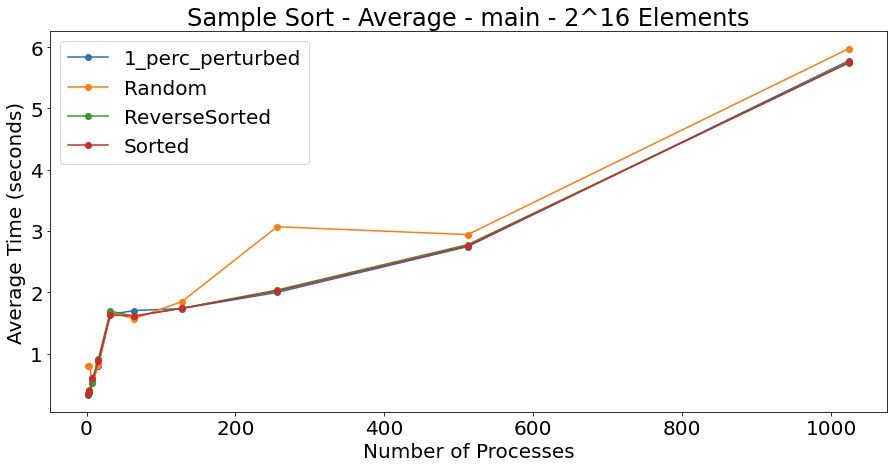

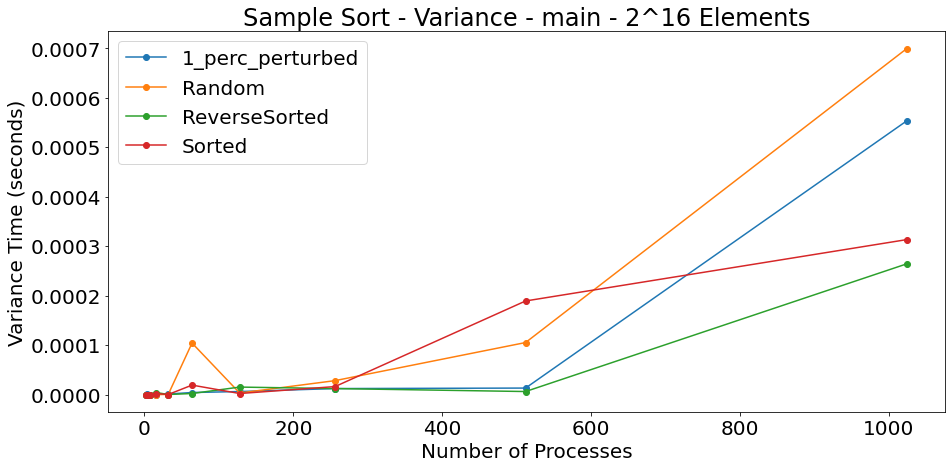

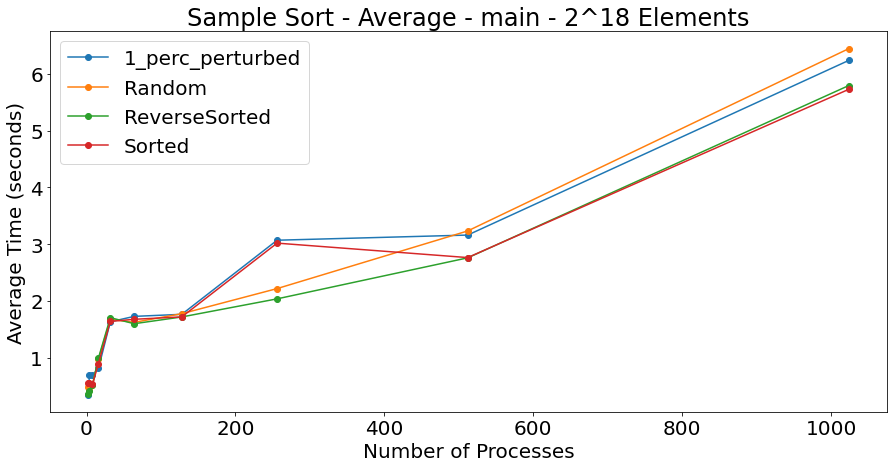

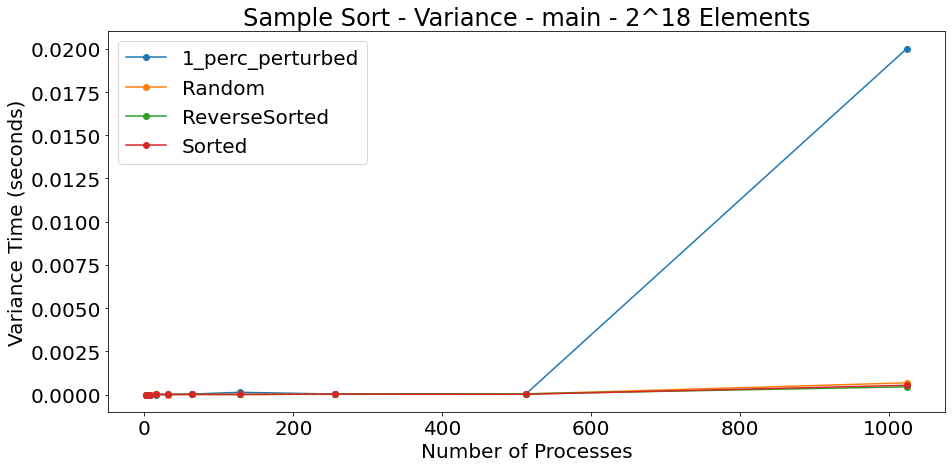

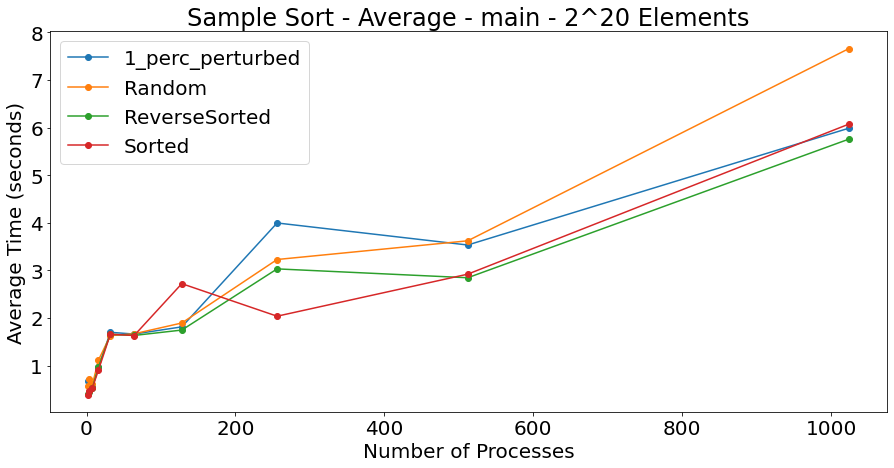

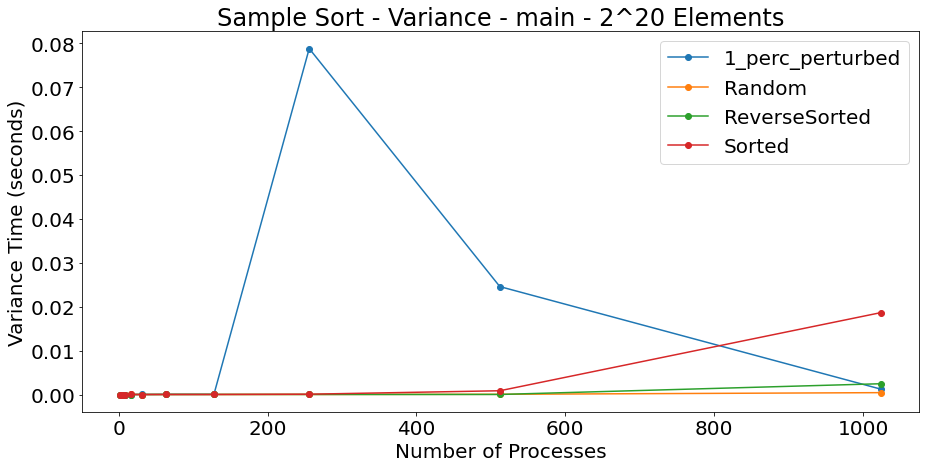

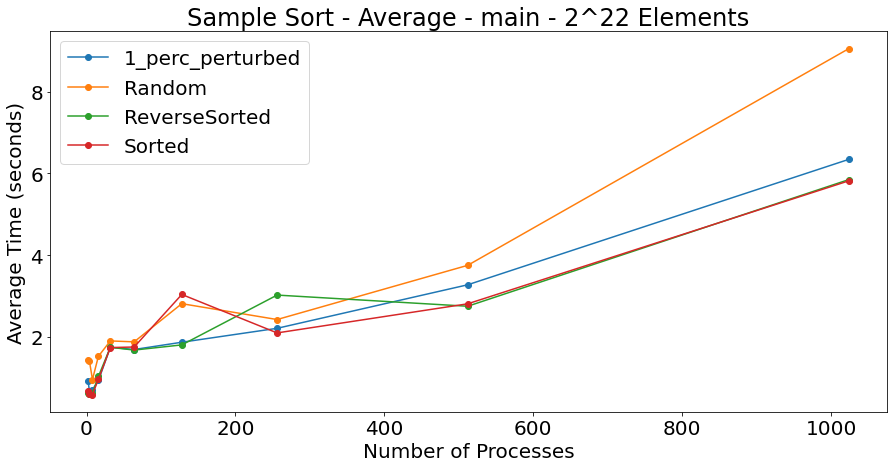

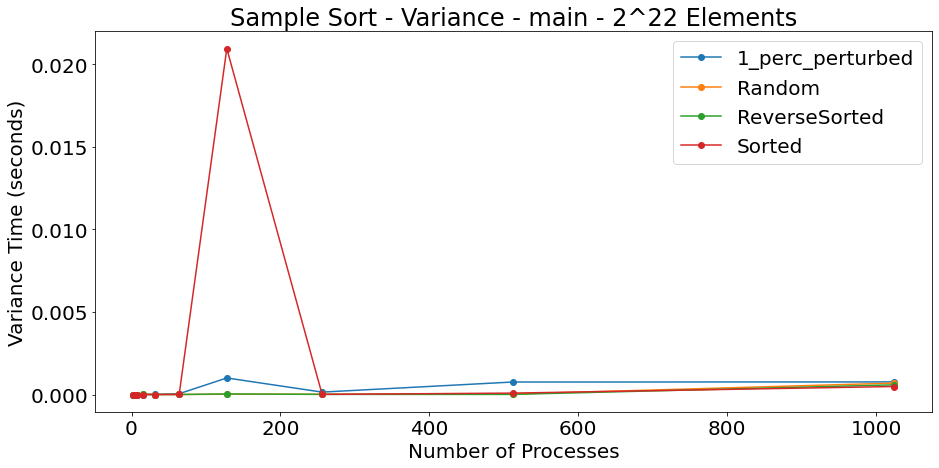

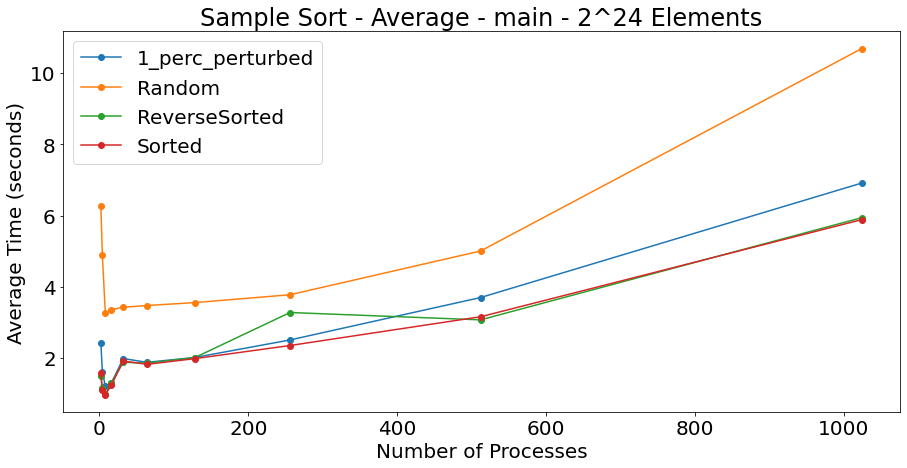

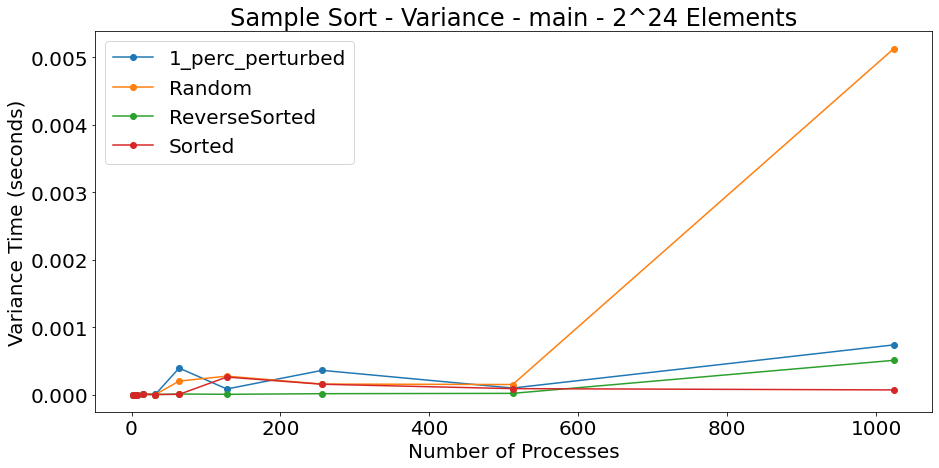

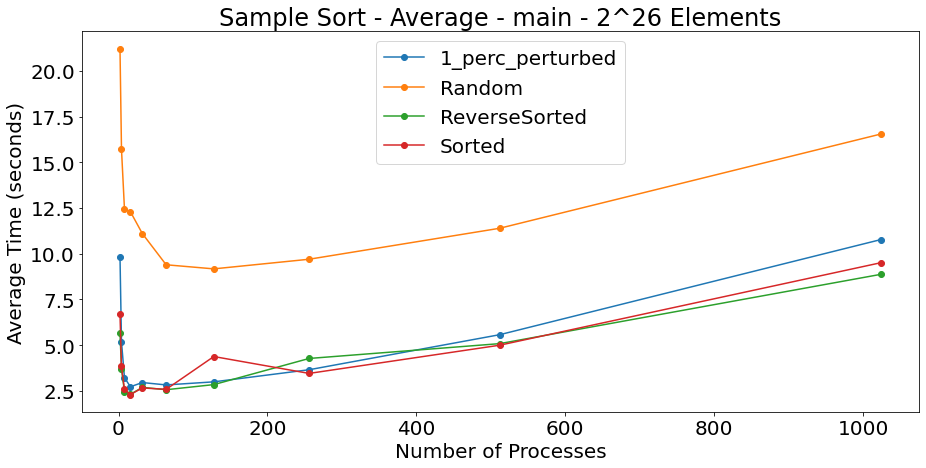

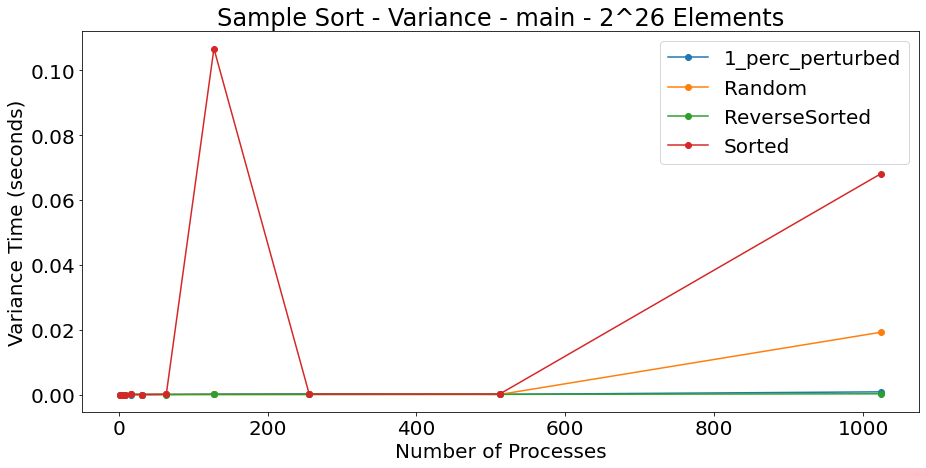

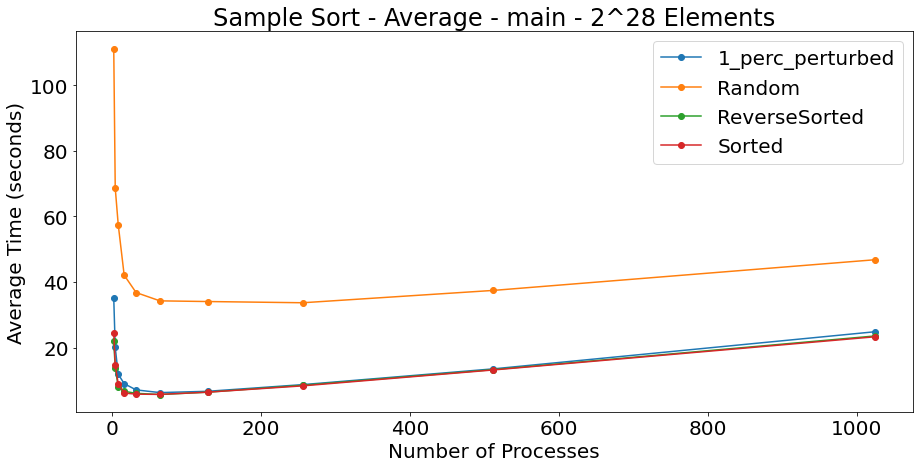

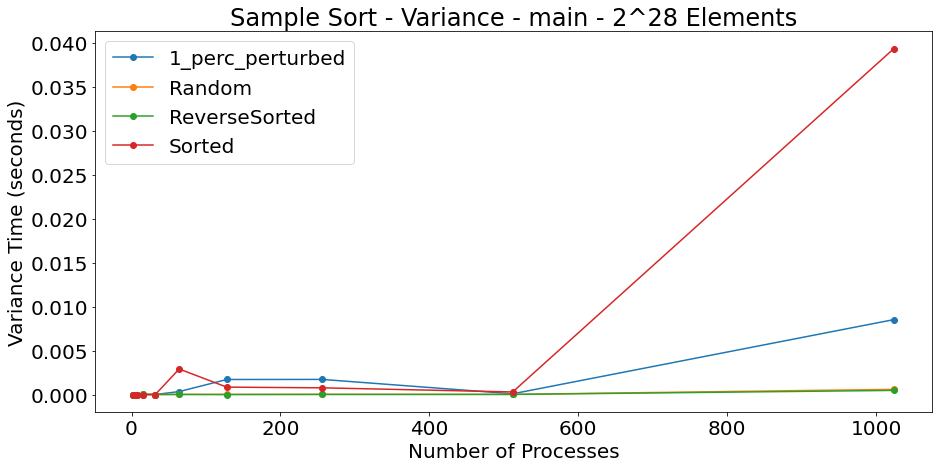

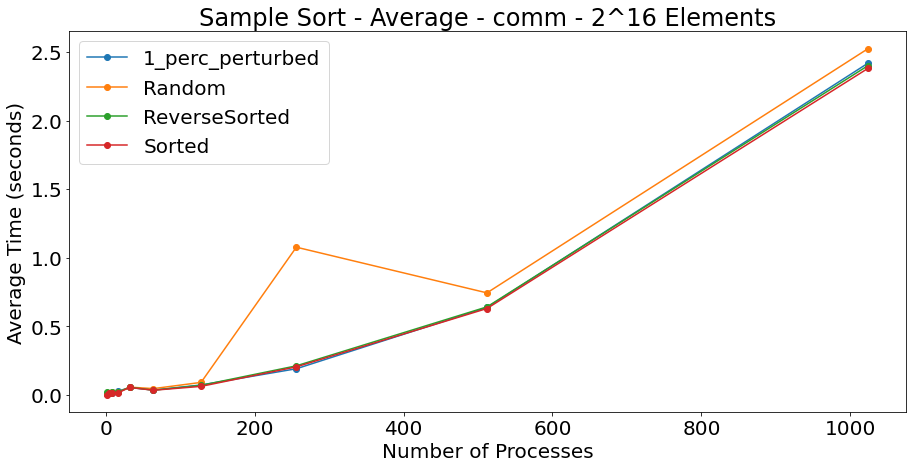

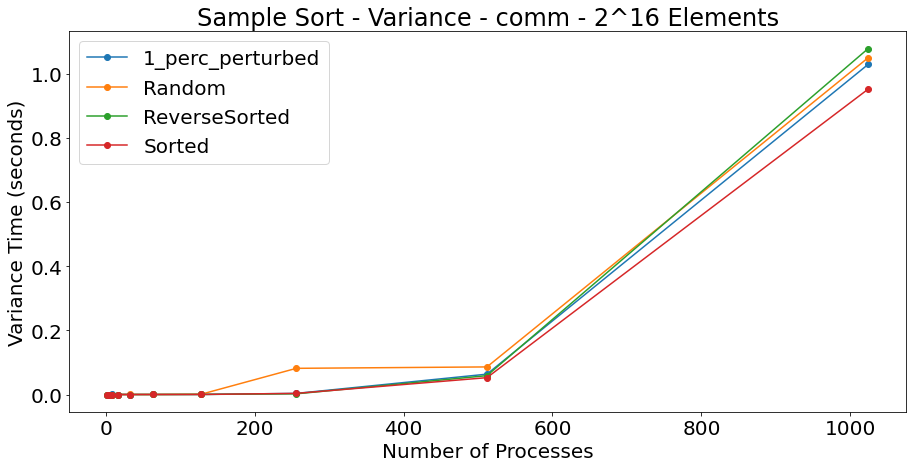

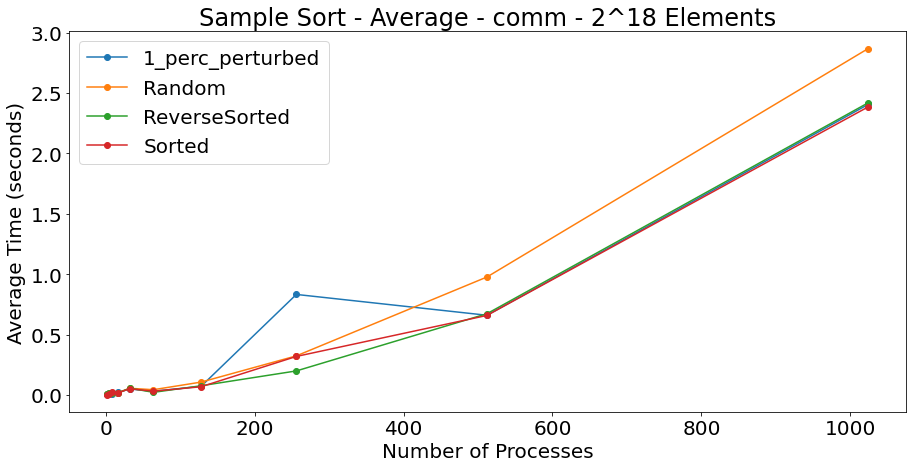

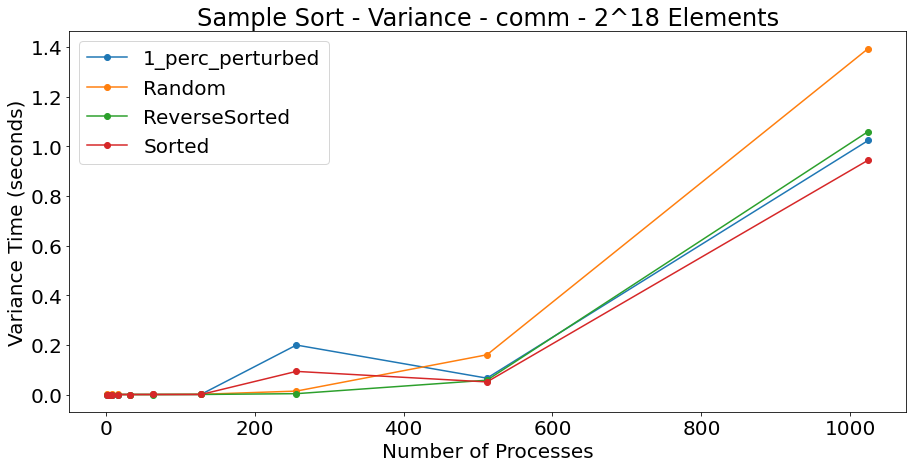

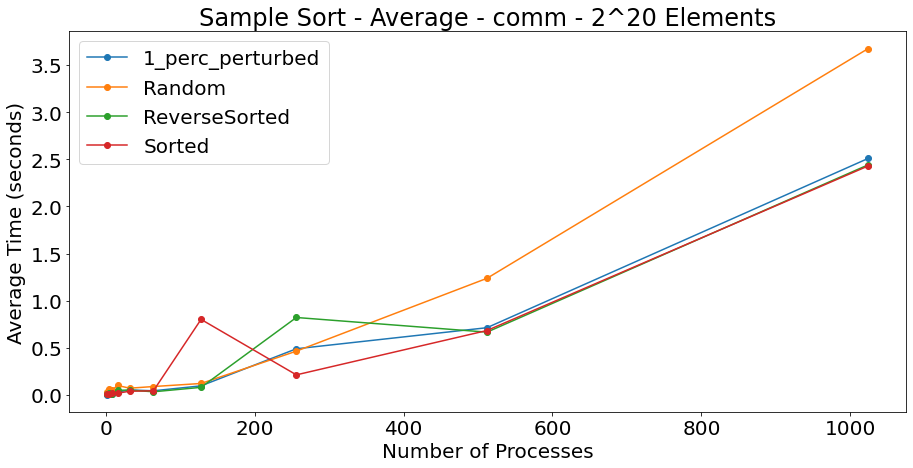

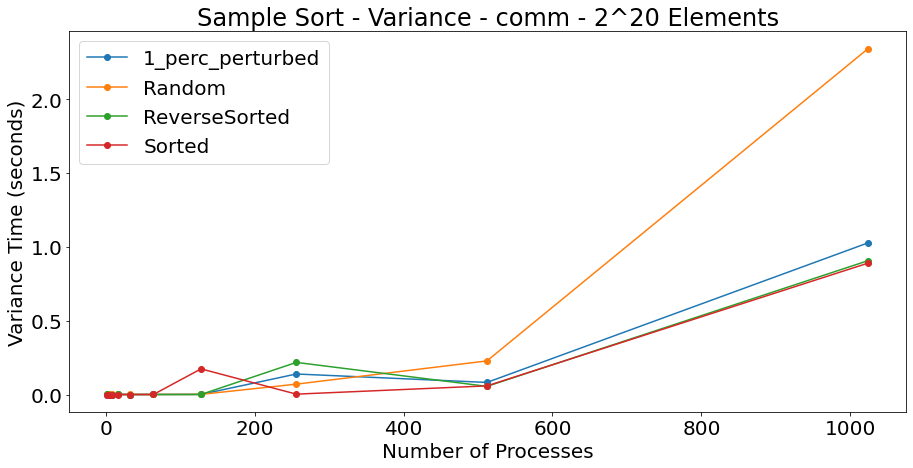

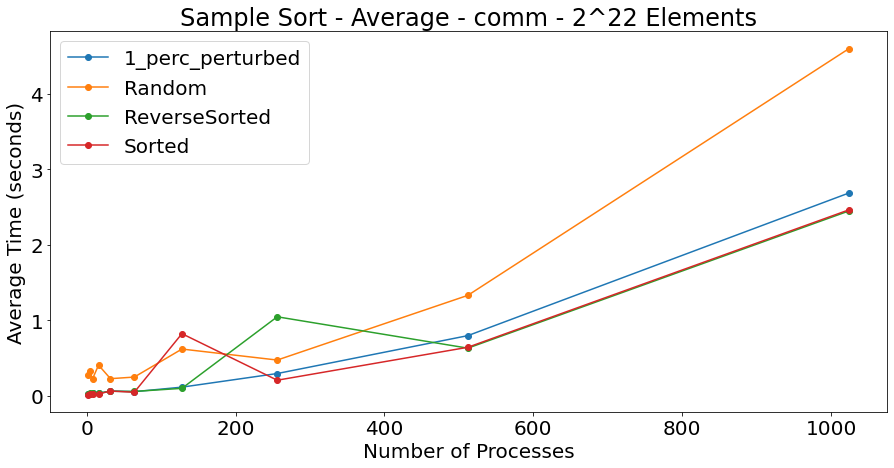

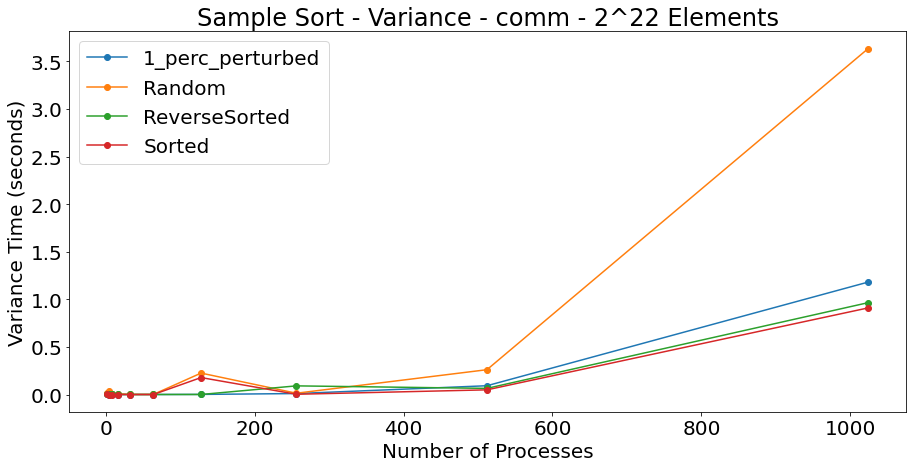

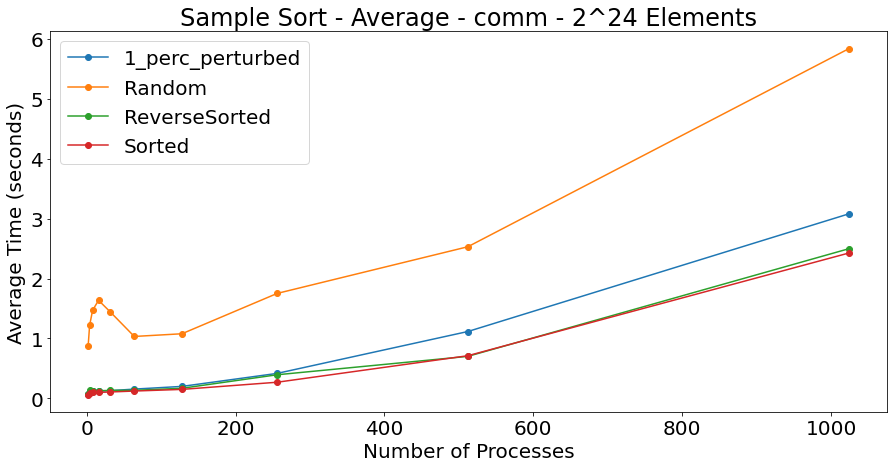

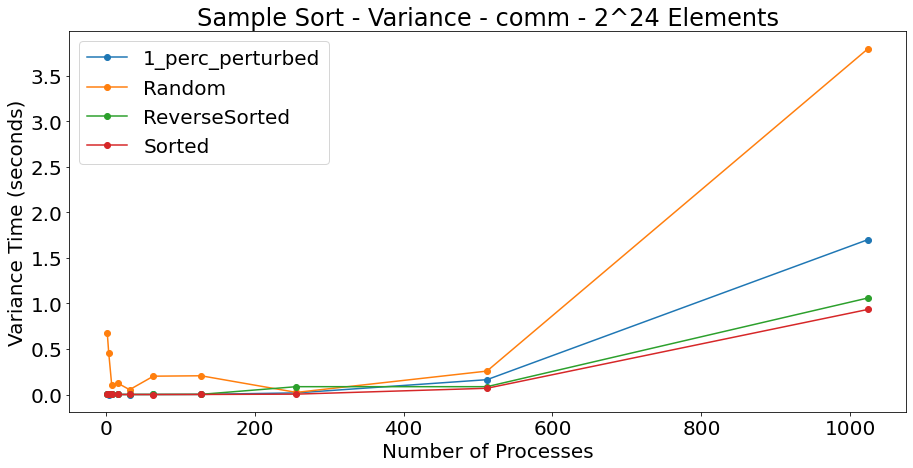

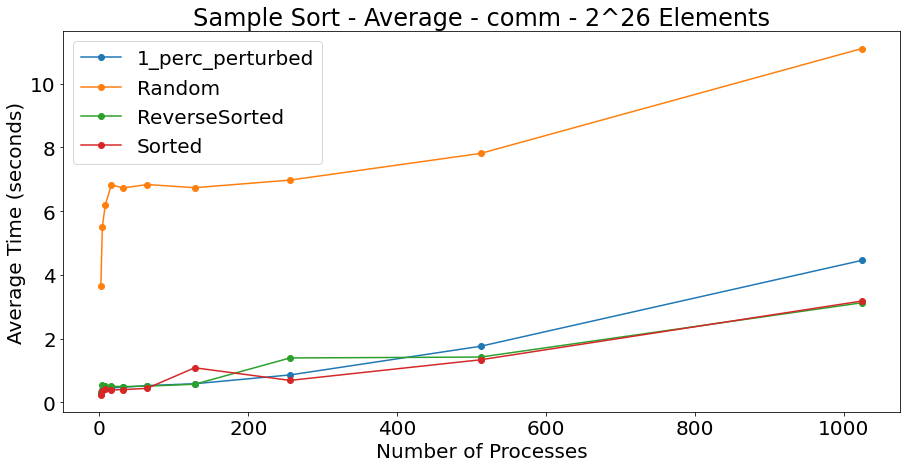

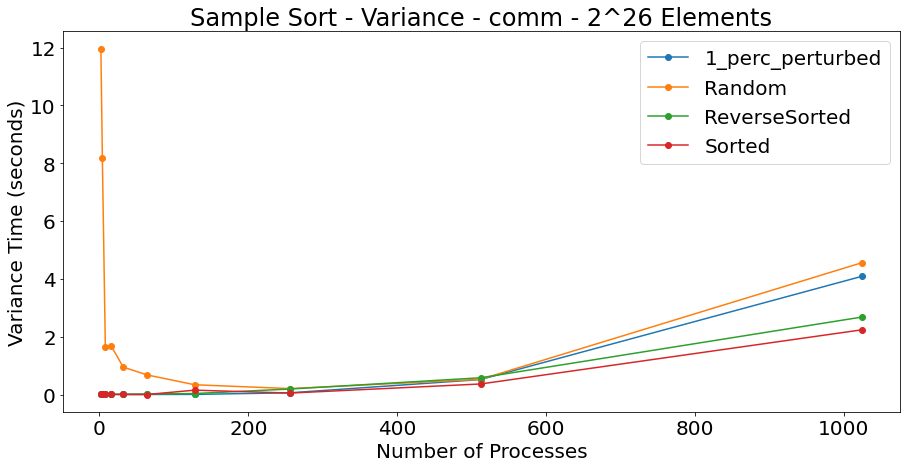

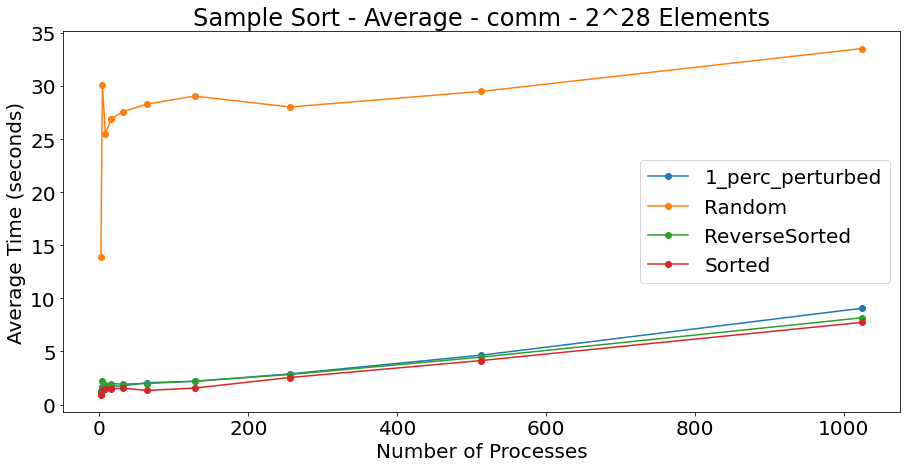

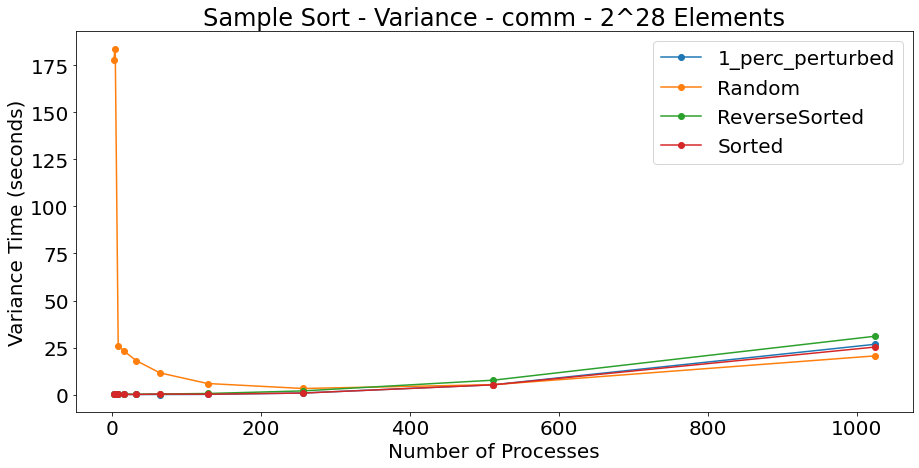

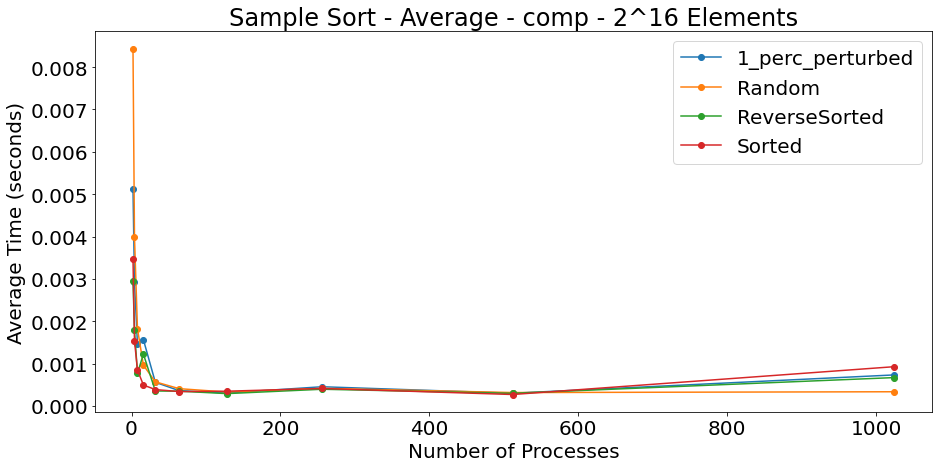

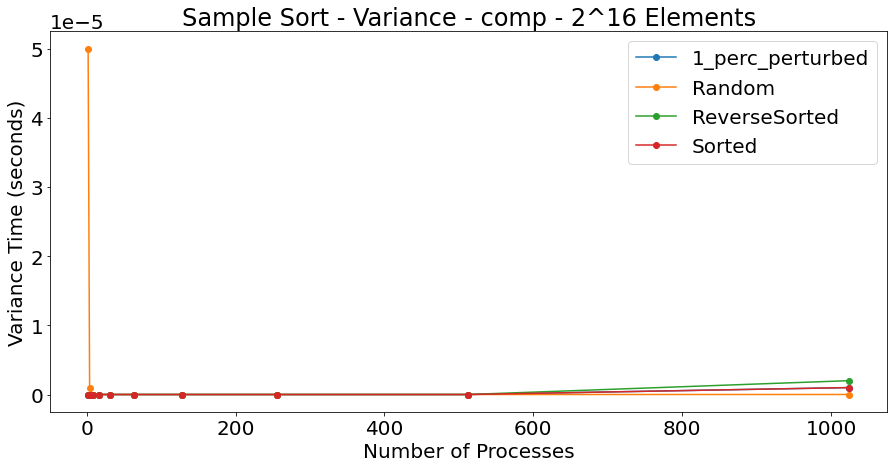

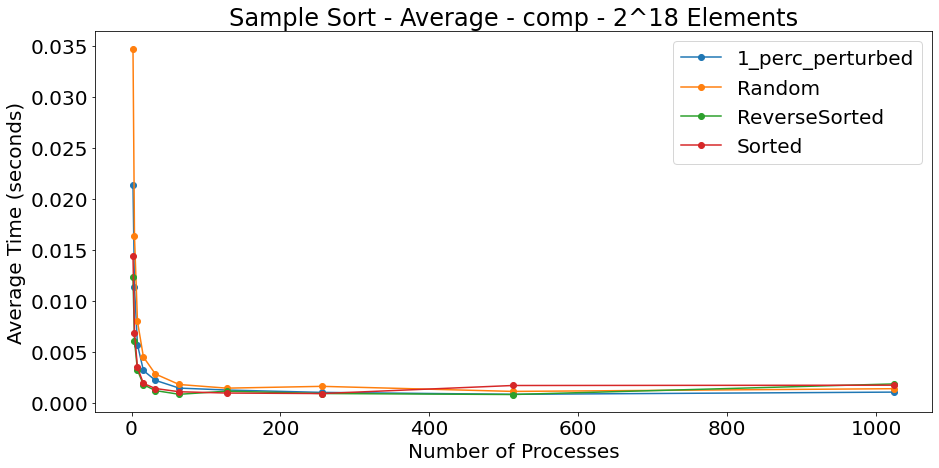

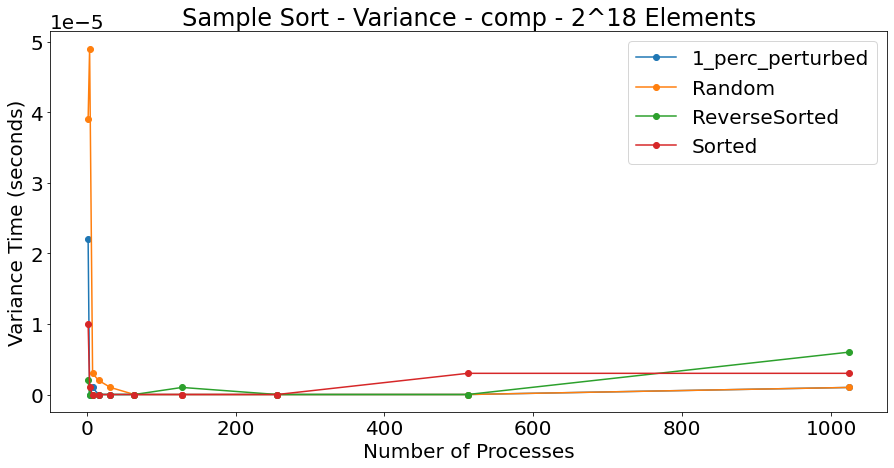

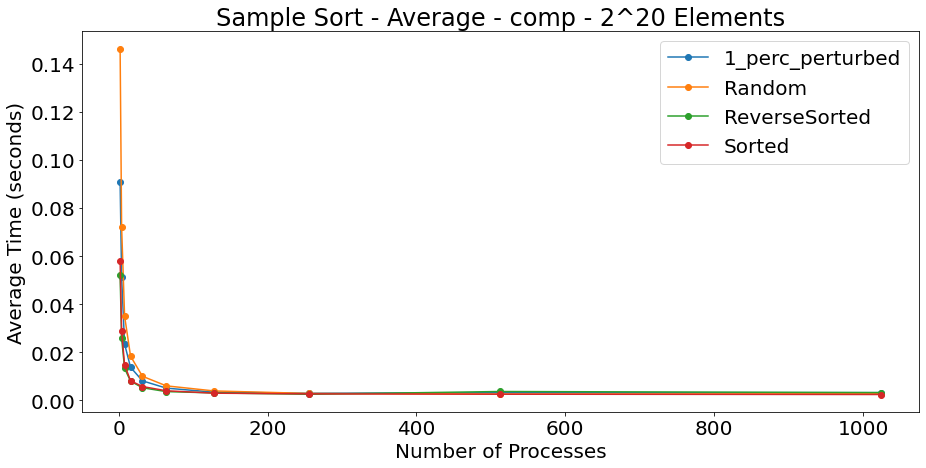

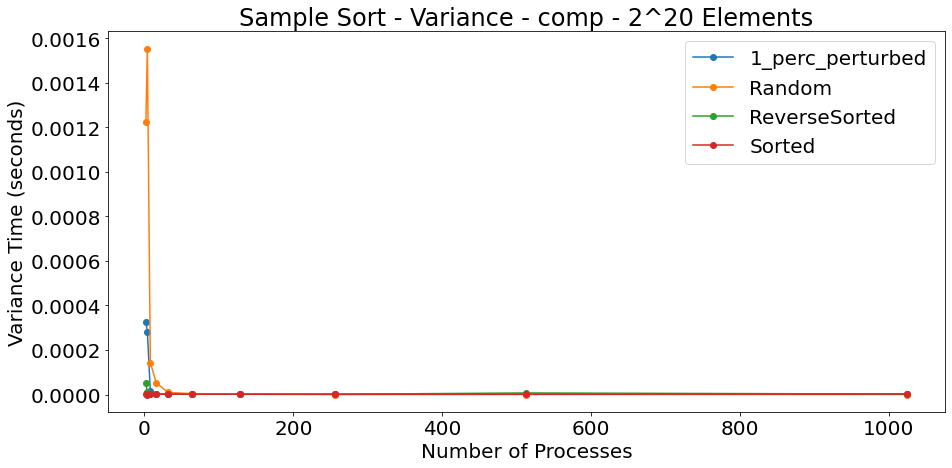

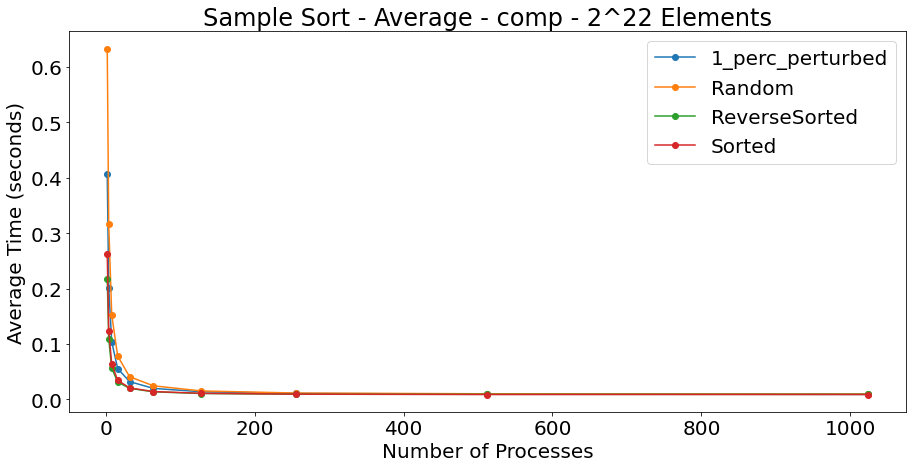

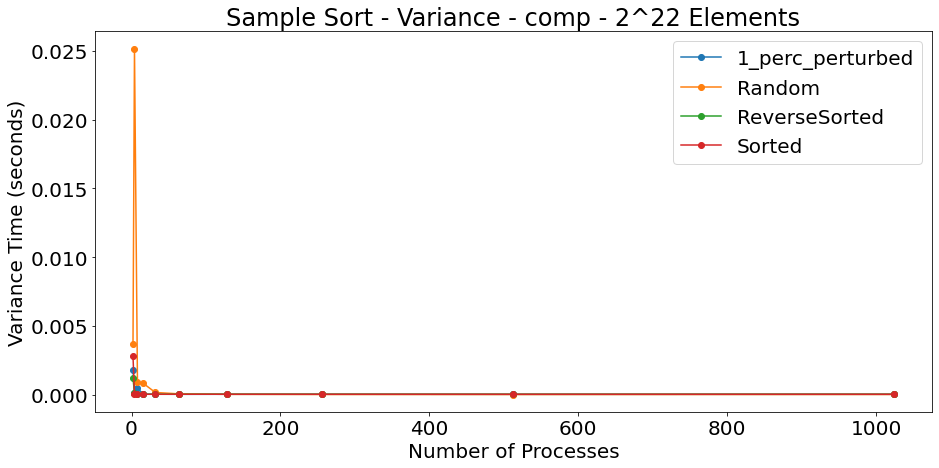

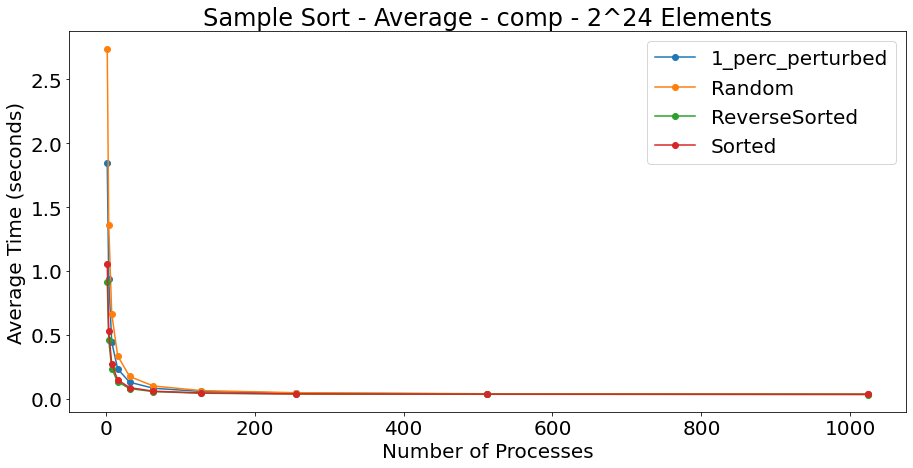

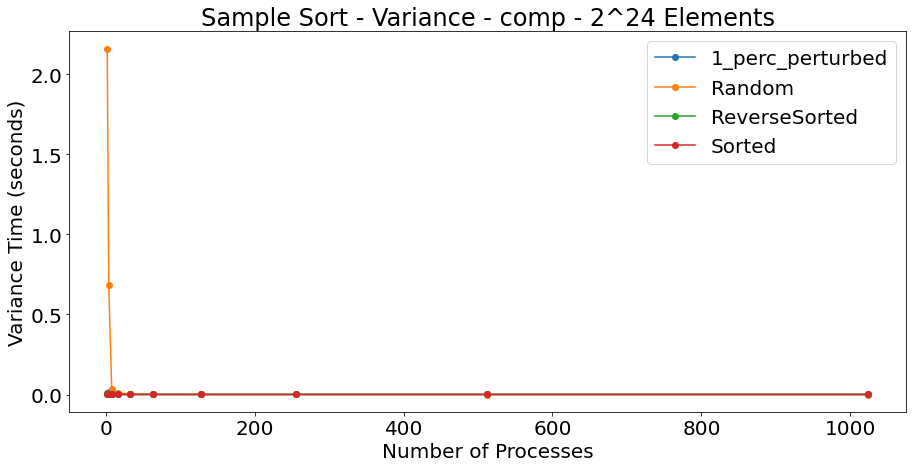

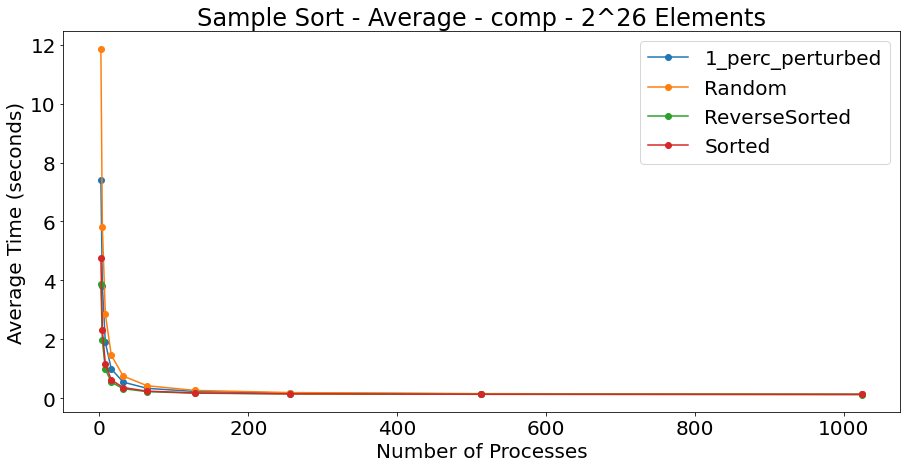

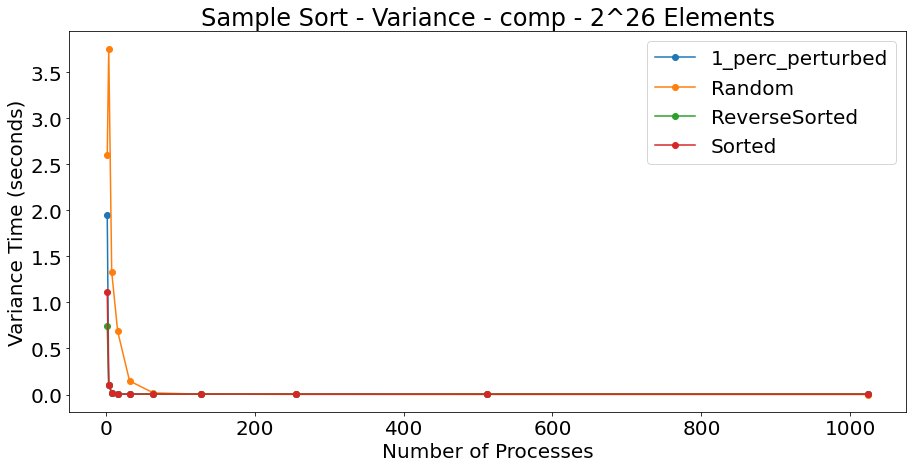

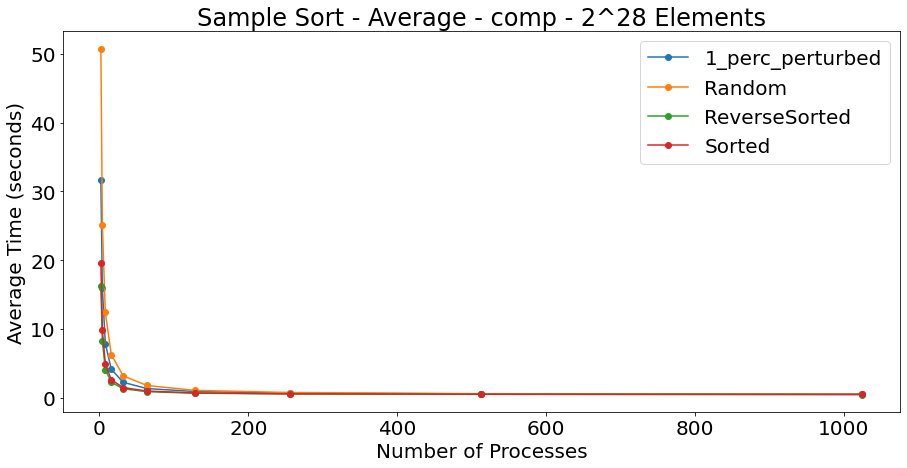

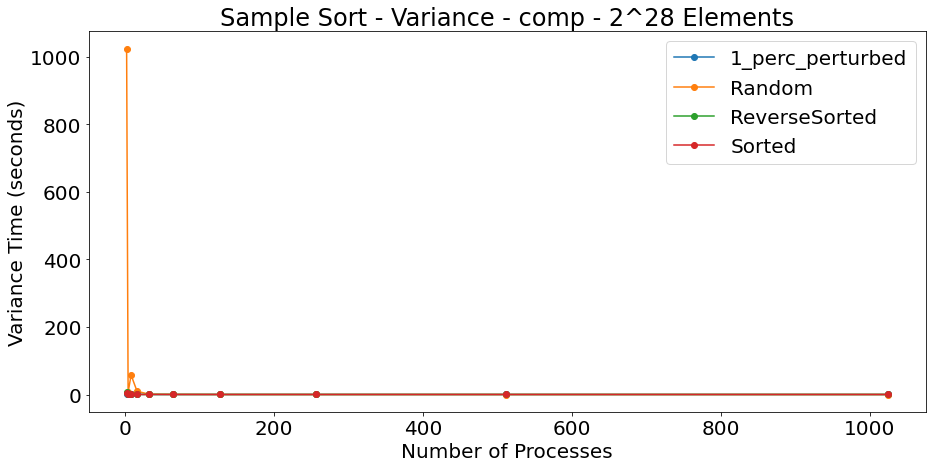

In [90]:
from math import log2

def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        figsize=(15,7)
    )
    return plot

important_names = ["comm", "comp" , "main"]

# Strong Scaling
for node in tk.graph.traverse():
    if node.frame["name"] not in important_names:
        continue

    node_df = tk.dataframe.loc[node, ["Min time/rank", "Max time/rank", "Avg time/rank", "Variance time/rank"]].unstack(level="input_size").unstack(level="input_type")
    for input_size in input_sizes:
        region_name = node.frame["name"]
        mat_df = node_df[[("Avg time/rank", input_size, input_types[0]), ("Avg time/rank", input_size, input_types[1]),
                          ("Avg time/rank", input_size, input_types[2]), ("Avg time/rank", input_size, input_types[3])]]
        mat_df.columns = input_types
        input_size_exp = int(log2(input_size))

        avg_plot = plot_pandas(
            df=mat_df,
            title=f"Sample Sort - Average - {region_name} - 2^{input_size_exp} Elements",
            xlabel="Number of Processes",
            ylabel="Average Time (seconds)",
        )

        mat_df = node_df[[("Variance time/rank", input_size, input_types[0]), ("Variance time/rank", input_size, input_types[1]),
                          ("Variance time/rank", input_size, input_types[2]), ("Variance time/rank", input_size, input_types[3])]]
        mat_df.columns = input_types
        var_plot = plot_pandas(
            df=mat_df,
            title=f"Sample Sort - Variance - {region_name} - 2^{input_size_exp} Elements",
            xlabel="Number of Processes",
            ylabel="Variance Time (seconds)",
        )

        avg_plot
        var_plot

        avg_fig = avg_plot.get_figure()
        avg_fig.savefig(f"Graphs/Sample_Average_{region_name}_2^{input_size_exp}")
        var_fig = var_plot.get_figure()
        var_fig.savefig(f"Graphs/Sample_Variance_{region_name}_2^{input_size_exp}")